In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataTrain=pd.read_csv('laptop price.csv')

dataTrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price_Euro
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
dataTrain.shape

(1275, 15)

In [4]:
dataTrain.columns #to know the column names

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price_Euro'],
      dtype='object')

In [5]:
dataTrain['Company'].unique() ##to know the unique Companys

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [6]:
dataTrain['Company'].value_counts() #to know the count of each Companys

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [7]:
dataTrain.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [8]:
dataTrain.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
CPU_Company,object
CPU_Type,object
CPU_Frequency (GHz),float64
RAM (GB),int64
Memory,object


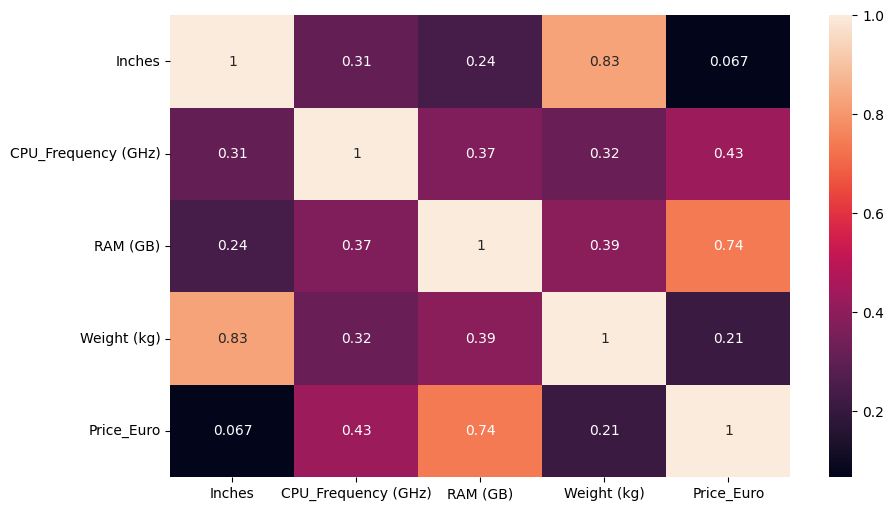

In [9]:
plt.figure(figsize=(10,6))
numerical_features = dataTrain.select_dtypes(include=['number']).columns
corr = dataTrain[numerical_features].corr()
sns.heatmap(corr,annot=True)
plt.show()

<Axes: xlabel='Inches', ylabel='Price_Euro'>

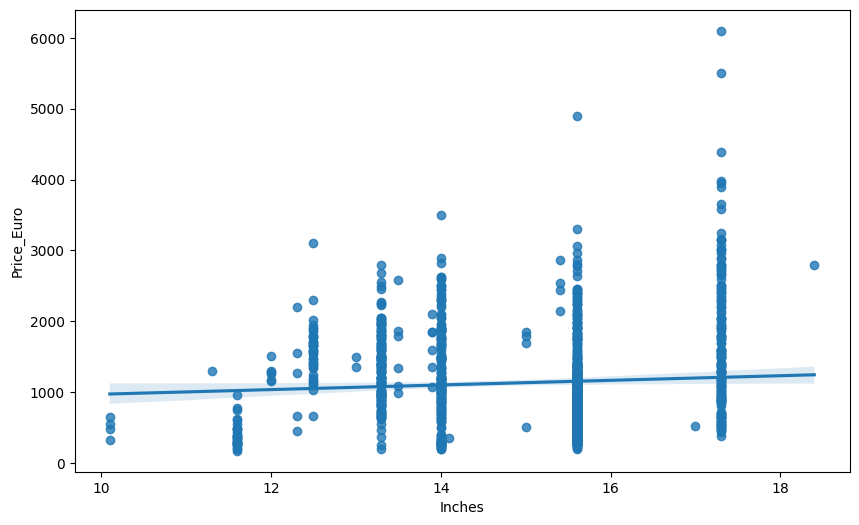

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(x="Inches", y="Price_Euro", data=dataTrain)

In [11]:
import scipy.stats as stats # Import the required module with an alias

pearson_coef, p_value = stats.pearsonr(dataTrain['Inches'], dataTrain['Price_Euro'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.06660794107004485  with a P-value of P = 0.017374358184649517


<Axes: xlabel='CPU_Frequency (GHz)', ylabel='Price_Euro'>

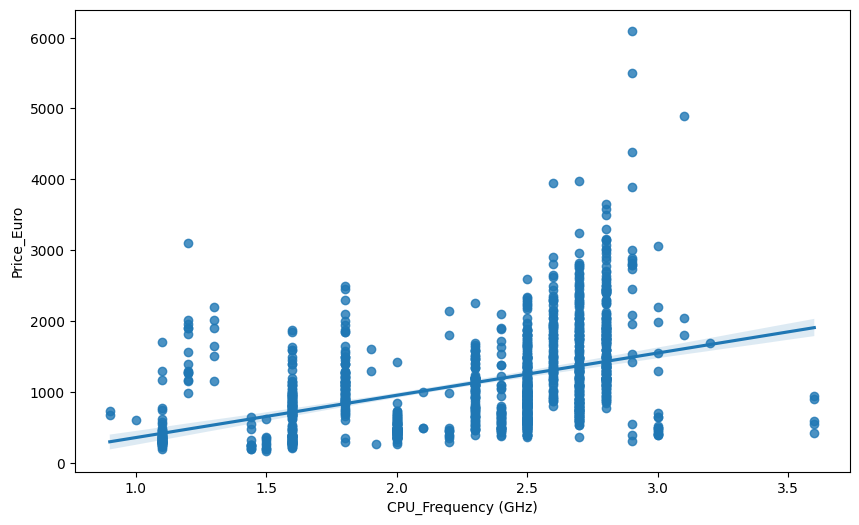

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(x="CPU_Frequency (GHz)", y="Price_Euro", data=dataTrain)

In [13]:
import scipy.stats as stats # Import the required module with an alias

pearson_coef, p_value = stats.pearsonr(dataTrain['CPU_Frequency (GHz)'], dataTrain['Price_Euro'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.42884723773161754  with a P-value of P = 3.4429282782017154e-58


<Axes: xlabel='RAM (GB)', ylabel='Price_Euro'>

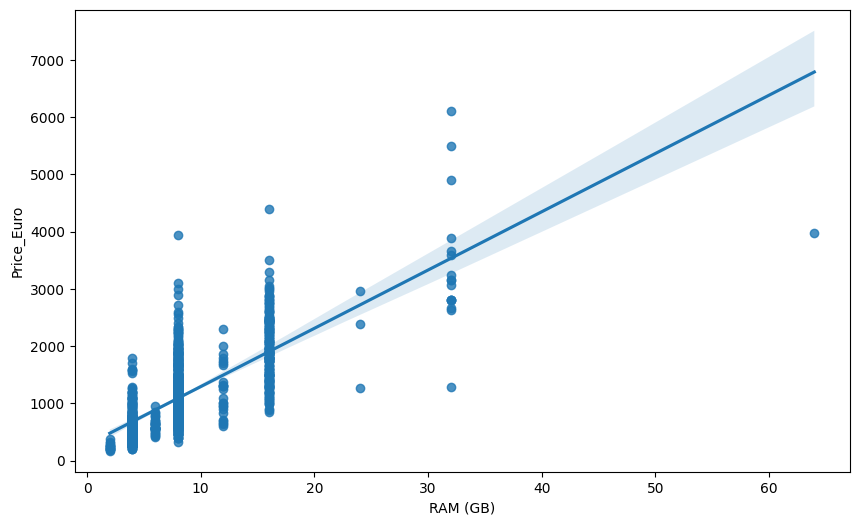

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(x="RAM (GB)", y="Price_Euro", data=dataTrain)

In [15]:
import scipy.stats as stats # Import the required module with an alias

pearson_coef, p_value = stats.pearsonr(dataTrain['RAM (GB)'], dataTrain['Price_Euro'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.74028652716227  with a P-value of P = 9.132905716145099e-222


<Axes: xlabel='Weight (kg)', ylabel='Price_Euro'>

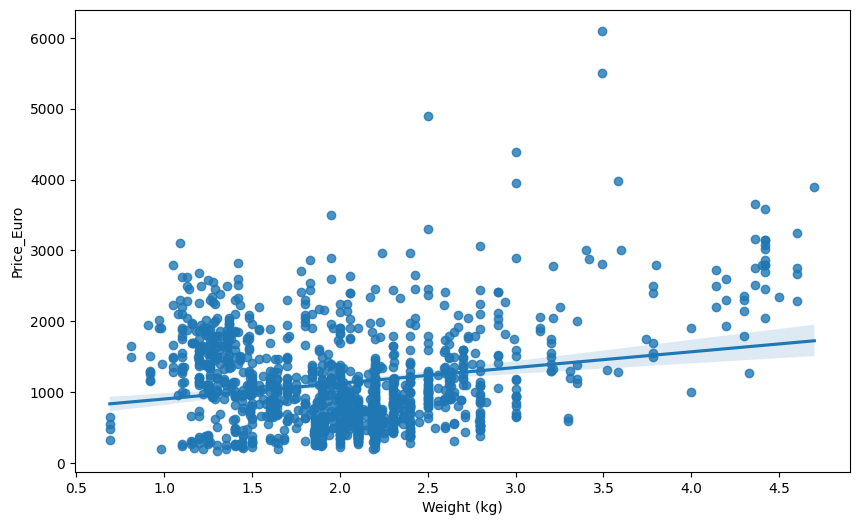

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x="Weight (kg)", y="Price_Euro", data=dataTrain)

In [17]:
import scipy.stats as stats # Import the required module with an alias

pearson_coef, p_value = stats.pearsonr(dataTrain['Weight (kg)'], dataTrain['Price_Euro'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.21188344492206518  with a P-value of P = 2.0846394670542536e-14


<Axes: xlabel='Company', ylabel='Price_Euro'>

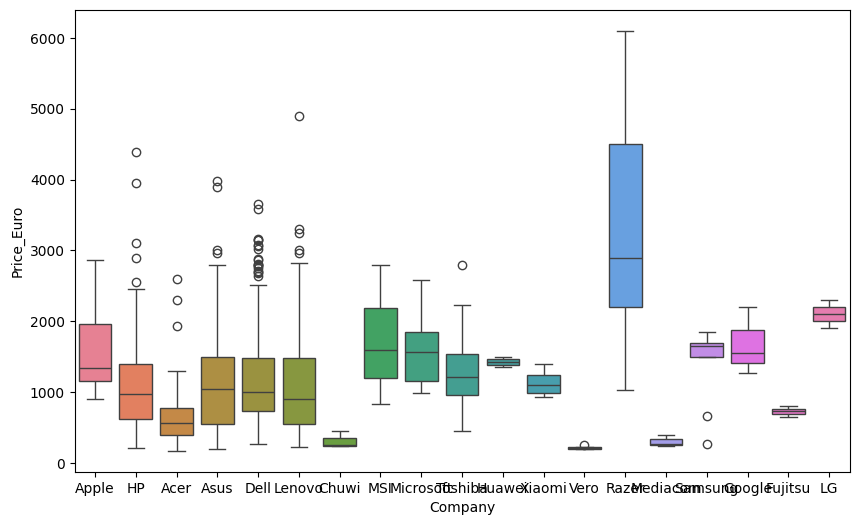

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Company", y="Price_Euro", data=dataTrain, palette="husl")

<Axes: xlabel='Product', ylabel='Price_Euro'>

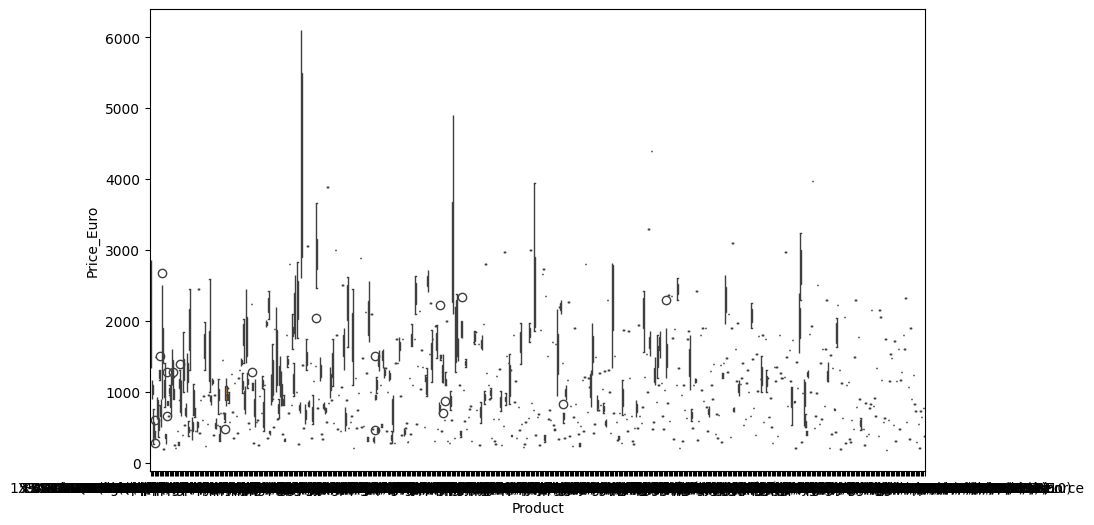

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Product", y="Price_Euro", data=dataTrain, palette="husl")

<Axes: xlabel='TypeName', ylabel='Price_Euro'>

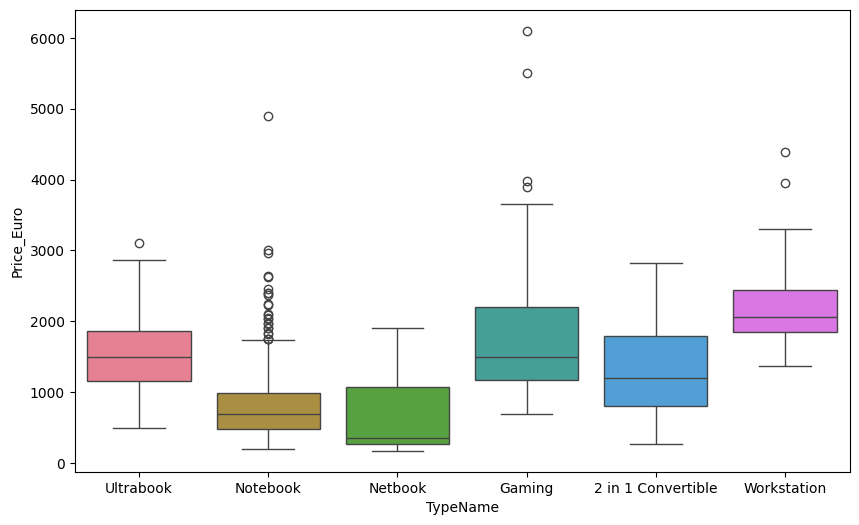

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="TypeName", y="Price_Euro", data=dataTrain, palette="husl")

<Axes: xlabel='ScreenResolution', ylabel='Price_Euro'>

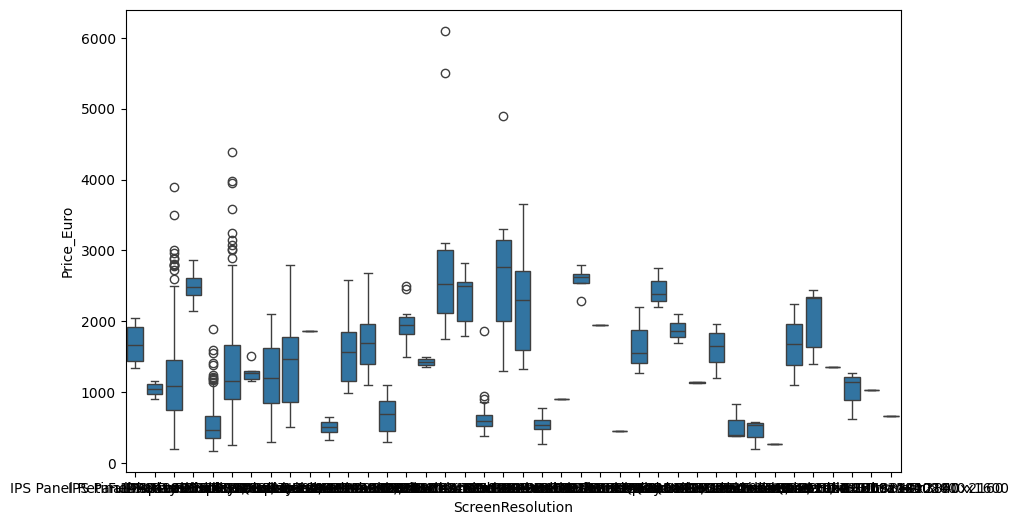

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ScreenResolution", y="Price_Euro", data=dataTrain)

<Axes: xlabel='CPU_Company', ylabel='Price_Euro'>

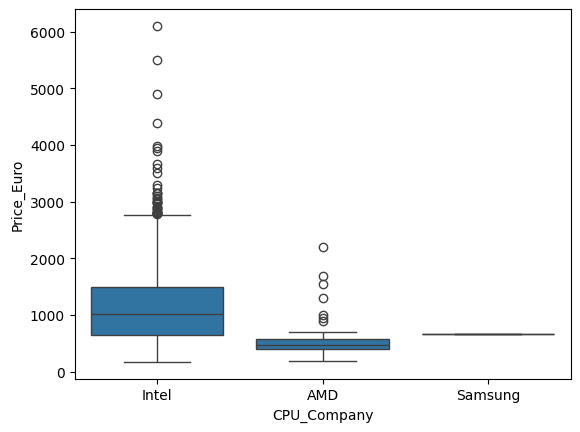

In [22]:
sns.boxplot(x="CPU_Company", y="Price_Euro", data=dataTrain)

<Axes: xlabel='CPU_Type', ylabel='Price_Euro'>

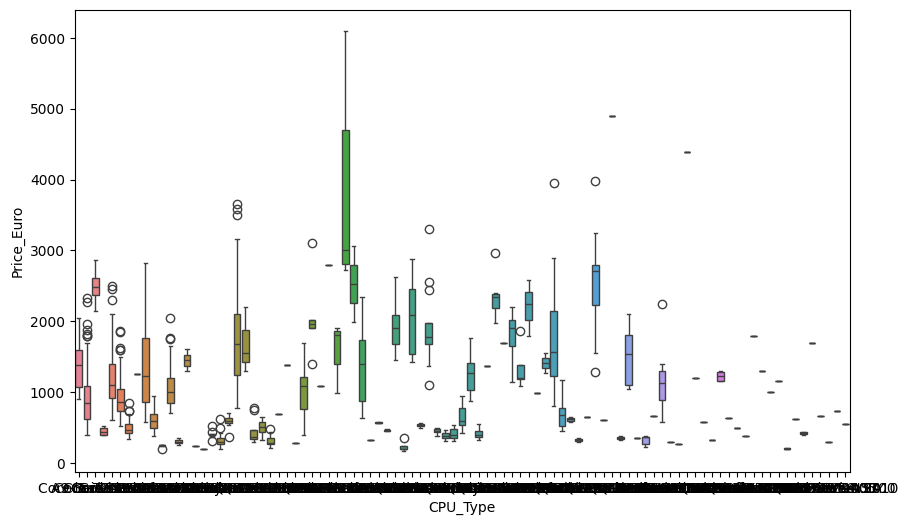

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="CPU_Type", y="Price_Euro", data=dataTrain, palette="husl")

<Axes: xlabel='Memory', ylabel='Price_Euro'>

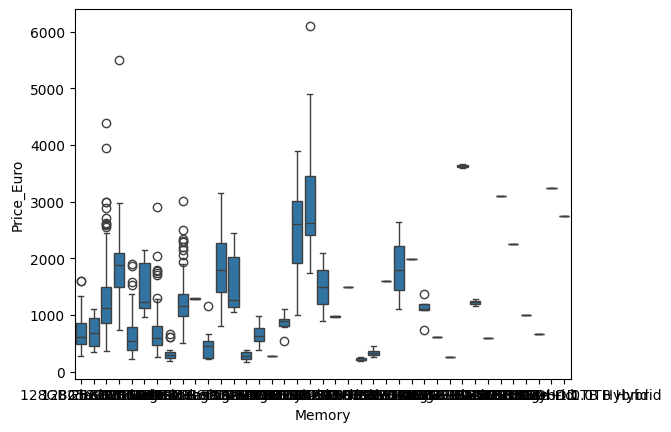

In [24]:
sns.boxplot(x="Memory", y="Price_Euro", data=dataTrain)

<Axes: xlabel='GPU_Company', ylabel='Price_Euro'>

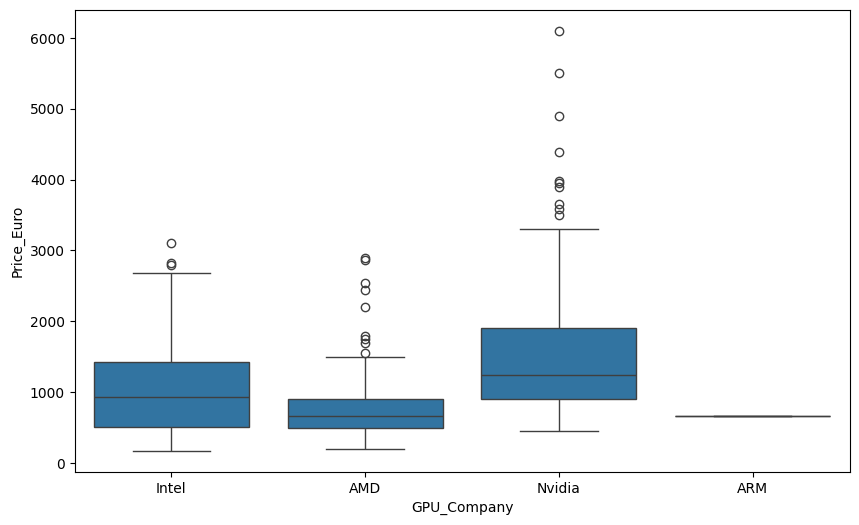

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="GPU_Company", y="Price_Euro", data=dataTrain)

<Axes: xlabel='GPU_Type', ylabel='Price_Euro'>

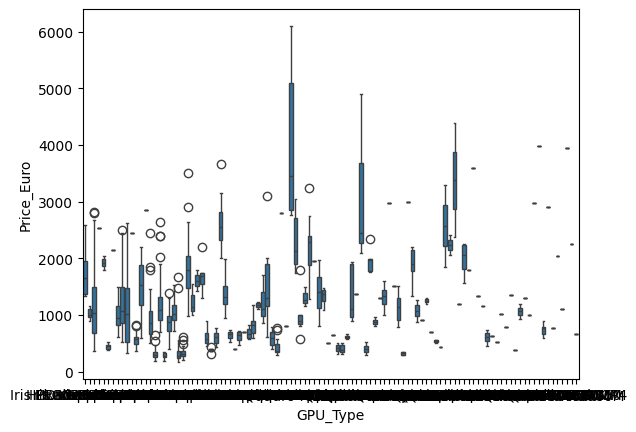

In [26]:
sns.boxplot(x="GPU_Type", y="Price_Euro", data=dataTrain)

<Axes: xlabel='OpSys', ylabel='Price_Euro'>

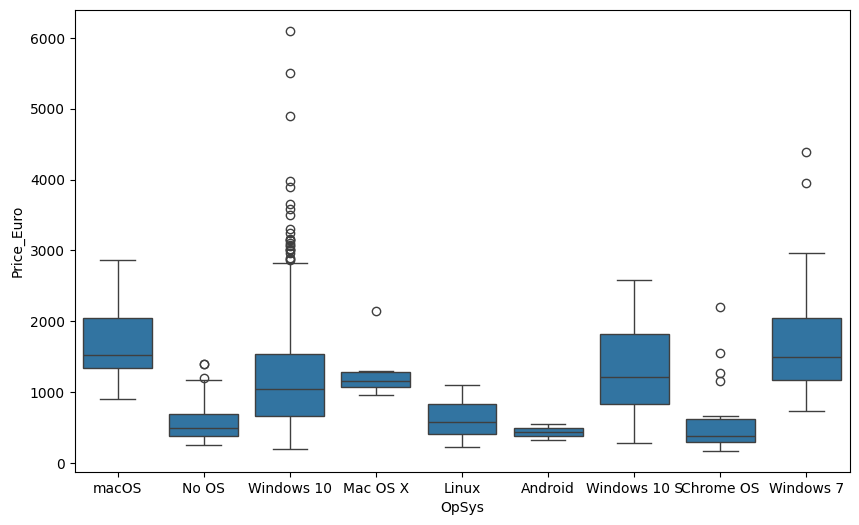

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x="OpSys", y="Price_Euro", data=dataTrain)

In [28]:
dataTrain.drop(['Inches'], axis = 1, inplace = True)

In [29]:
column_names = dataTrain.columns.tolist()
column_names

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'CPU_Company',
 'CPU_Type',
 'CPU_Frequency (GHz)',
 'RAM (GB)',
 'Memory',
 'GPU_Company',
 'GPU_Type',
 'OpSys',
 'Weight (kg)',
 'Price_Euro']

In [30]:
feature_column_names = dataTrain.drop(['Price_Euro'], axis = 1).columns.tolist()
feature_column_names

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'CPU_Company',
 'CPU_Type',
 'CPU_Frequency (GHz)',
 'RAM (GB)',
 'Memory',
 'GPU_Company',
 'GPU_Type',
 'OpSys',
 'Weight (kg)']

In [31]:
dataTrain.shape


(1275, 14)

In [32]:
dataTrain.describe()

,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price_Euro
count,1275.000000,1275.000000,1275.000000,1275.000000
mean,2.302980,8.440784,2.040525,1134.969059
std,0.503846,5.097809,0.669196,700.752504
min,0.900000,2.000000,0.690000,174.000000
25%,2.000000,4.000000,1.500000,609.000000
50%,2.500000,8.000000,2.040000,989.000000
75%,2.700000,8.000000,2.310000,1496.500000
max,3.600000,64.000000,4.700000,6099.000000


In [33]:
# delete all rows with column 'price' has value <100
price = dataTrain[ (dataTrain['Price_Euro'] < 100.00)  ].index
dataTrain.drop(price, inplace = True)

In [34]:
dataTrain.shape

(1275, 14)

In [35]:
#This is a check for categorical data
dataTrain.describe(include=['object'])

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,40,3,93,39,4,106,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel,Core i5 7200U,256GB SSD,Intel,HD Graphics 620,Windows 10
freq,291,30,707,505,1214,193,412,704,280,1048


In [36]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.Company = labelencoder.fit_transform(dataTrain.Company)
dataTrain.Product = labelencoder.fit_transform(dataTrain.Product)
dataTrain.TypeName = labelencoder.fit_transform(dataTrain.TypeName)
dataTrain.ScreenResolution = labelencoder.fit_transform(dataTrain.ScreenResolution)

dataTrain.CPU_Company = labelencoder.fit_transform(dataTrain.CPU_Company)
dataTrain.CPU_Type = labelencoder.fit_transform(dataTrain.CPU_Type)
dataTrain.Memory = labelencoder.fit_transform(dataTrain.Memory)
dataTrain.GPU_Company = labelencoder.fit_transform(dataTrain.GPU_Company)
dataTrain.GPU_Type = labelencoder.fit_transform(dataTrain.GPU_Type)
dataTrain.OpSys = labelencoder.fit_transform(dataTrain.OpSys)

In [37]:
dataTrain.head(10)

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price_Euro
0,1,300,4,23,1,40,2.3,8,4,2,56,8,1.37,1339.69
1,1,301,4,1,1,40,1.8,8,2,2,50,8,1.34,898.94
2,7,50,3,8,1,46,2.5,8,16,2,52,4,1.86,575.00
3,1,300,4,25,1,54,2.7,16,29,0,76,8,1.83,2537.45
4,1,300,4,23,1,40,3.1,8,16,2,57,8,1.37,1803.60
5,0,58,3,0,0,11,3.0,4,26,0,84,5,2.10,400.00
6,1,300,4,25,1,54,2.2,16,15,2,58,3,2.04,2139.97
7,1,301,4,1,1,40,1.8,8,15,2,50,8,1.34,1158.70
8,2,608,4,8,1,70,1.8,16,29,3,37,5,1.30,1495.00
9,0,430,4,15,1,53,1.6,8,16,2,105,5,1.60,770.00


In [38]:
#values before data transformation
x_train_actual=dataTrain.iloc[:,0:11]
y_train_actual=dataTrain.iloc[:,12]

In [39]:
# Calculate the z-score from with scipy #ideally the values range from -1 to 1

import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)

In [40]:
dataTrain

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price_Euro
0,-1.333546,-0.042870,1.136135,1.737738,0.216459,-0.603861,-0.005918,-0.086499,-1.549159,-0.039845,0.335039,3.081382,-1.002380,0.292259
1,-1.333546,-0.037025,1.136135,-1.056229,0.216459,-0.603861,-0.998674,-0.086499,-1.801288,-0.039845,0.104487,3.081382,-1.047227,-0.336954
2,0.131784,-1.504040,0.334490,-0.167240,0.216459,-0.250415,0.391185,-0.086499,-0.036386,-0.039845,0.181337,-0.787414,-0.269871,-0.799410
3,-1.333546,-0.042870,1.136135,1.991735,0.216459,0.220846,0.788288,1.483418,1.602452,-2.201665,1.103545,3.081382,-0.314718,2.002178
4,-1.333546,-0.042870,1.136135,1.737738,0.216459,-0.603861,1.582493,-0.086499,-0.036386,-0.039845,0.373464,3.081382,-1.002380,0.954536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,0.864449,1.593640,-2.070444,0.467753,0.216459,0.279753,0.391185,-0.871458,-1.549159,-0.039845,-0.049215,0.179785,-0.359566,-0.709472
1271,0.864449,1.640397,-2.070444,1.229744,0.216459,0.279753,0.391185,1.483418,1.602452,-0.039845,-0.049215,0.179785,-1.107024,0.519690
1272,0.864449,-0.650717,0.334490,-1.183228,0.216459,-1.782013,-1.395777,-1.263937,2.358839,-0.039845,-0.318192,0.179785,-0.808041,-1.293359
1273,0.131784,-1.784584,0.334490,-1.183228,0.216459,0.279753,0.391185,-0.478979,-0.792772,-2.201665,1.564649,0.179785,0.223452,-0.529594


In [41]:
#In case the value is outside this range, may indicate potential outliers
#resulting in impacting model predictions.
#Since outliers had been dealt earlier, so just clipping the value

#it was observed that clipping the values to this range affects the performance (however postitively)
dataTrain = dataTrain.clip(-1, 1)

In [42]:
x_train=dataTrain.iloc[:,0:11]
y_train=dataTrain.iloc[:,12]

In [43]:
x_train.head()

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type
0,-1.000000,-0.042870,1.00000,1.00000,0.216459,-0.603861,-0.005918,-0.086499,-1.000000,-0.039845,0.335039
1,-1.000000,-0.037025,1.00000,-1.00000,0.216459,-0.603861,-0.998674,-0.086499,-1.000000,-0.039845,0.104487
2,0.131784,-1.000000,0.33449,-0.16724,0.216459,-0.250415,0.391185,-0.086499,-0.036386,-0.039845,0.181337
3,-1.000000,-0.042870,1.00000,1.00000,0.216459,0.220846,0.788288,1.000000,1.000000,-1.000000,1.000000
4,-1.000000,-0.042870,1.00000,1.00000,0.216459,-0.603861,1.000000,-0.086499,-0.036386,-0.039845,0.373464


In [44]:
y_train.head()

,Weight (kg)
0,-1.000000
1,-1.000000
2,-0.269871
3,-0.314718
4,-1.000000


In [45]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression #Multiple Linear Regression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [47]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=0) # changed X_train,X_test, Y_train,Y_test to x_train, x_test, y_train, y_test

In [48]:
y_pred_MLR = model_mlr.predict(x_test) # x_test is now defined from the train_test_split

In [49]:
mse1 = mean_squared_error(y_test, y_pred_MLR) #MLR Evaluation
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.28915976885445954


In [50]:
mae1= mean_absolute_error(y_test, y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.4598412378397175


In [51]:
rf = RandomForestRegressor()  #Random Forest Regressor
model_rf = rf.fit(x_train,y_train)

In [52]:
y_pred_RF = model_rf.predict(x_test)

In [53]:
mse2 = mean_squared_error(y_test, y_pred_RF)  #Random Forest Evaluation
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.11321537913075082


In [54]:
mae2= mean_absolute_error(y_test, y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.22903478677109776


In [55]:
LassoModel = Lasso() #LASSO Model
model_lm = LassoModel.fit(x_train,y_train)

In [56]:
y_pred_LSO = model_lm.predict(x_test)

In [57]:
mae3= mean_absolute_error(y_test, y_pred_LSO)  #LASSO Evaluation (checking another model)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.5948581470494407


In [58]:
mse3 = mean_squared_error(y_test, y_pred_LSO)  #Mean Squared Error for the LASSO Model
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.4826067562282246


In [59]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [60]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.459841
1,Random Forest,0.229035
2,LASSO,0.594858


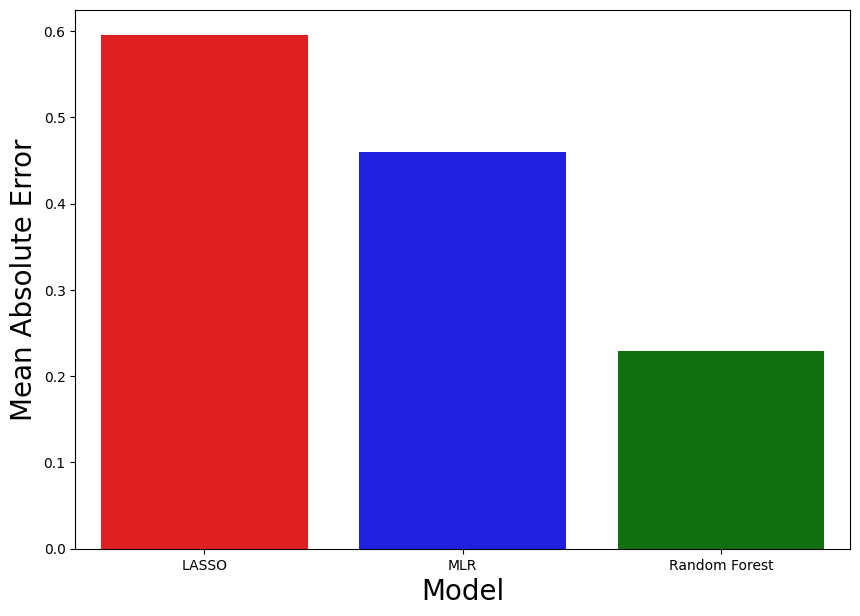

In [62]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))

model_colors = ['red', 'blue', 'green']

sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe, palette=model_colors)

axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()